# Exploratory Data Analysis

In [1]:
!pip install pandas_profiling
!pip install sweetviz


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
from keras.models import load_model

In [3]:
br = pd.read_csv("D:\\Stock Market Data Analysis\\bergerpaint.csv")

In [4]:
br

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1-March-2023,584.95,585.00,575.75,580.85,581.247581,54560,3452,31712868.0,24120.0,44.21,9.25,-4.10
1,28-February-2023,550.05,582.60,550.05,580.20,571.598180,81860,4770,46791027.0,44717.0,54.63,32.55,30.15
2,27-February-2023,553.05,559.10,550.00,557.20,554.498412,33372,3086,18504721.0,16201.0,48.55,9.10,4.15
3,24-February-2023,556.15,569.85,552.30,558.40,560.124837,29975,1310,16789742.0,18213.0,60.76,17.55,2.25
4,23-February-2023,567.25,567.25,552.60,560.50,558.820772,33700,3220,18832260.0,10329.0,30.65,14.65,-6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,7-March-2013,195.00,196.00,190.70,194.40,193.892632,40254,962,7804954.0,11390.0,28.30,5.30,-0.60
2471,6-March-2013,191.00,196.70,188.40,191.05,192.457812,89943,2130,17310233.0,15923.0,17.70,8.30,0.05
2472,5-March-2013,191.20,194.00,189.10,189.70,190.657514,28661,1005,5464435.0,6820.0,23.80,4.90,-1.50
2473,4-March-2013,193.30,193.30,186.55,189.40,189.351339,34471,1395,6527130.0,6454.0,18.72,6.75,-3.90


In [5]:
br1=br.iloc[::-1].reset_index(drop=True)
br1

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1-March-2013,194.00,197.00,190.00,192.40,194.197707,51814,1396,10062160.0,10022.0,19.34,7.00,-1.60
1,4-March-2013,193.30,193.30,186.55,189.40,189.351339,34471,1395,6527130.0,6454.0,18.72,6.75,-3.90
2,5-March-2013,191.20,194.00,189.10,189.70,190.657514,28661,1005,5464435.0,6820.0,23.80,4.90,-1.50
3,6-March-2013,191.00,196.70,188.40,191.05,192.457812,89943,2130,17310233.0,15923.0,17.70,8.30,0.05
4,7-March-2013,195.00,196.00,190.70,194.40,193.892632,40254,962,7804954.0,11390.0,28.30,5.30,-0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,23-February-2023,567.25,567.25,552.60,560.50,558.820772,33700,3220,18832260.0,10329.0,30.65,14.65,-6.75
2471,24-February-2023,556.15,569.85,552.30,558.40,560.124837,29975,1310,16789742.0,18213.0,60.76,17.55,2.25
2472,27-February-2023,553.05,559.10,550.00,557.20,554.498412,33372,3086,18504721.0,16201.0,48.55,9.10,4.15
2473,28-February-2023,550.05,582.60,550.05,580.20,571.598180,81860,4770,46791027.0,44717.0,54.63,32.55,30.15


In [6]:
br1["Date"]=pd.to_datetime(br1["Date"])
br1

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2013-03-01,194.00,197.00,190.00,192.40,194.197707,51814,1396,10062160.0,10022.0,19.34,7.00,-1.60
1,2013-03-04,193.30,193.30,186.55,189.40,189.351339,34471,1395,6527130.0,6454.0,18.72,6.75,-3.90
2,2013-03-05,191.20,194.00,189.10,189.70,190.657514,28661,1005,5464435.0,6820.0,23.80,4.90,-1.50
3,2013-03-06,191.00,196.70,188.40,191.05,192.457812,89943,2130,17310233.0,15923.0,17.70,8.30,0.05
4,2013-03-07,195.00,196.00,190.70,194.40,193.892632,40254,962,7804954.0,11390.0,28.30,5.30,-0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,2023-02-23,567.25,567.25,552.60,560.50,558.820772,33700,3220,18832260.0,10329.0,30.65,14.65,-6.75
2471,2023-02-24,556.15,569.85,552.30,558.40,560.124837,29975,1310,16789742.0,18213.0,60.76,17.55,2.25
2472,2023-02-27,553.05,559.10,550.00,557.20,554.498412,33372,3086,18504721.0,16201.0,48.55,9.10,4.15
2473,2023-02-28,550.05,582.60,550.05,580.20,571.598180,81860,4770,46791027.0,44717.0,54.63,32.55,30.15


In [7]:
#creating columns day,month,year for visualization purpose
br1["day"]=br1["Date"].dt.strftime("%d")
br1["month"]=br1["Date"].dt.strftime("%b")
br1["year"]=br1["Date"].dt.strftime("%y")

In [8]:
br1

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,day,month,year
0,2013-03-01,194.00,197.00,190.00,192.40,194.197707,51814,1396,10062160.0,10022.0,19.34,7.00,-1.60,01,Mar,13
1,2013-03-04,193.30,193.30,186.55,189.40,189.351339,34471,1395,6527130.0,6454.0,18.72,6.75,-3.90,04,Mar,13
2,2013-03-05,191.20,194.00,189.10,189.70,190.657514,28661,1005,5464435.0,6820.0,23.80,4.90,-1.50,05,Mar,13
3,2013-03-06,191.00,196.70,188.40,191.05,192.457812,89943,2130,17310233.0,15923.0,17.70,8.30,0.05,06,Mar,13
4,2013-03-07,195.00,196.00,190.70,194.40,193.892632,40254,962,7804954.0,11390.0,28.30,5.30,-0.60,07,Mar,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,2023-02-23,567.25,567.25,552.60,560.50,558.820772,33700,3220,18832260.0,10329.0,30.65,14.65,-6.75,23,Feb,23
2471,2023-02-24,556.15,569.85,552.30,558.40,560.124837,29975,1310,16789742.0,18213.0,60.76,17.55,2.25,24,Feb,23
2472,2023-02-27,553.05,559.10,550.00,557.20,554.498412,33372,3086,18504721.0,16201.0,48.55,9.10,4.15,27,Feb,23
2473,2023-02-28,550.05,582.60,550.05,580.20,571.598180,81860,4770,46791027.0,44717.0,54.63,32.55,30.15,28,Feb,23


In [9]:
br1.tail(10)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,day,month,year
2465,2023-02-16,558.35,563.45,555.60,562.15,560.626496,9858,872,5526656.0,3940.0,39.97,7.85,3.80,16,Feb,23
2466,2023-02-17,564.90,569.75,561.35,568.90,566.243265,12250,940,6936480.0,5565.0,45.43,8.40,4.00,17,Feb,23
2467,2023-02-20,573.30,573.30,563.65,570.40,567.649928,16011,1038,9088643.0,6482.0,40.48,9.65,-2.90,20,Feb,23
2468,2023-02-21,569.15,573.80,564.10,570.65,569.234856,39207,2142,22317991.0,26439.0,67.43,9.70,1.50,21,Feb,23
2469,2023-02-22,560.05,570.15,560.05,566.65,563.405617,40018,2920,22546366.0,17673.0,44.16,10.10,6.60,22,Feb,23
2470,2023-02-23,567.25,567.25,552.60,560.50,558.820772,33700,3220,18832260.0,10329.0,30.65,14.65,-6.75,23,Feb,23
2471,2023-02-24,556.15,569.85,552.30,558.40,560.124837,29975,1310,16789742.0,18213.0,60.76,17.55,2.25,24,Feb,23
2472,2023-02-27,553.05,559.10,550.00,557.20,554.498412,33372,3086,18504721.0,16201.0,48.55,9.10,4.15,27,Feb,23
2473,2023-02-28,550.05,582.60,550.05,580.20,571.598180,81860,4770,46791027.0,44717.0,54.63,32.55,30.15,28,Feb,23
2474,2023-03-01,584.95,585.00,575.75,580.85,581.247581,54560,3452,31712868.0,24120.0,44.21,9.25,-4.10,01,Mar,23


In [10]:
br1.head(10)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,day,month,year
0,2013-03-01,194.0,197.00,190.00,192.40,194.197707,51814,1396,10062160.0,10022.0,19.34,7.00,-1.60,01,Mar,13
1,2013-03-04,193.3,193.30,186.55,189.40,189.351339,34471,1395,6527130.0,6454.0,18.72,6.75,-3.90,04,Mar,13
2,2013-03-05,191.2,194.00,189.10,189.70,190.657514,28661,1005,5464435.0,6820.0,23.80,4.90,-1.50,05,Mar,13
3,2013-03-06,191.0,196.70,188.40,191.05,192.457812,89943,2130,17310233.0,15923.0,17.70,8.30,0.05,06,Mar,13
4,2013-03-07,195.0,196.00,190.70,194.40,193.892632,40254,962,7804954.0,11390.0,28.30,5.30,-0.60,07,Mar,13
5,2013-03-08,197.6,203.90,195.90,201.50,201.374078,126952,2794,25564842.0,30341.0,23.90,8.00,3.90,08,Mar,13
6,2013-03-11,203.5,210.45,202.50,206.85,207.780317,326698,6403,67881414.0,54738.0,16.75,7.95,3.35,11,Mar,13
7,2013-03-12,210.0,212.75,196.30,198.80,205.669714,288371,5399,59309181.0,73354.0,25.44,16.45,-11.20,12,Mar,13
8,2013-03-13,198.0,199.75,192.20,194.00,195.398305,78337,2222,15306917.0,15409.0,19.67,7.55,-4.00,13,Mar,13
9,2013-03-14,194.0,196.30,188.65,192.10,191.778990,76897,1997,14747229.0,19625.0,25.52,7.65,-1.90,14,Mar,13


# Data Structure 

In [11]:
type(br1)
br1.shape

(2475, 16)

# Data types

In [12]:
br1.dtypes

Date                         datetime64[ns]
Open Price                          float64
High Price                          float64
Low Price                           float64
Close Price                         float64
WAP                                 float64
No.of Shares                          int64
No. of Trades                         int64
Total Turnover (Rs.)                float64
Deliverable Quantity                float64
% Deli. Qty to Traded Qty           float64
Spread High-Low                     float64
Spread Close-Open                   float64
day                                  object
month                                object
year                                 object
dtype: object

# Duplicates

In [13]:
#Count of duplicated 
br1.duplicated().sum()

0

In [14]:
br1

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,day,month,year
0,2013-03-01,194.00,197.00,190.00,192.40,194.197707,51814,1396,10062160.0,10022.0,19.34,7.00,-1.60,01,Mar,13
1,2013-03-04,193.30,193.30,186.55,189.40,189.351339,34471,1395,6527130.0,6454.0,18.72,6.75,-3.90,04,Mar,13
2,2013-03-05,191.20,194.00,189.10,189.70,190.657514,28661,1005,5464435.0,6820.0,23.80,4.90,-1.50,05,Mar,13
3,2013-03-06,191.00,196.70,188.40,191.05,192.457812,89943,2130,17310233.0,15923.0,17.70,8.30,0.05,06,Mar,13
4,2013-03-07,195.00,196.00,190.70,194.40,193.892632,40254,962,7804954.0,11390.0,28.30,5.30,-0.60,07,Mar,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,2023-02-23,567.25,567.25,552.60,560.50,558.820772,33700,3220,18832260.0,10329.0,30.65,14.65,-6.75,23,Feb,23
2471,2023-02-24,556.15,569.85,552.30,558.40,560.124837,29975,1310,16789742.0,18213.0,60.76,17.55,2.25,24,Feb,23
2472,2023-02-27,553.05,559.10,550.00,557.20,554.498412,33372,3086,18504721.0,16201.0,48.55,9.10,4.15,27,Feb,23
2473,2023-02-28,550.05,582.60,550.05,580.20,571.598180,81860,4770,46791027.0,44717.0,54.63,32.55,30.15,28,Feb,23


# Null values

In [15]:
br1.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         8
% Deli. Qty to Traded Qty    8
Spread High-Low              0
Spread Close-Open            0
day                          0
month                        0
year                         0
dtype: int64

# Describe

In [16]:
br1.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03,2475.000000,2.475000e+03,2.467000e+03,2467.000000,2475.000000,2475.000000
mean,394.056283,399.264202,387.822404,393.178485,393.501871,6.855370e+04,1800.220202,2.534436e+07,3.077366e+04,34.847021,11.441798,-0.877798
std,197.910088,199.698070,195.226444,197.337038,197.333417,3.037949e+05,1857.361374,7.940656e+07,2.838887e+05,15.403263,8.157269,8.107676
min,175.000000,176.850000,171.050000,173.600000,173.004094,2.134000e+03,111.000000,4.465520e+05,9.610000e+02,3.540000,1.550000,-71.200000
25%,237.825000,241.850000,233.625000,237.275000,237.767287,2.387800e+04,736.500000,7.625916e+06,7.014000e+03,24.185000,6.150000,-4.400000
50%,296.950000,301.450000,292.000000,296.950000,296.713790,3.877800e+04,1228.000000,1.465309e+07,1.181000e+04,33.150000,9.200000,-0.850000
75%,564.375000,569.925000,556.425000,563.100000,562.940116,6.842650e+04,2205.500000,2.653086e+07,2.124950e+04,42.795000,14.175000,2.775000
max,870.000000,872.000000,851.700000,863.650000,859.363128,1.312096e+07,32620.000000,3.044025e+09,1.304344e+07,99.410000,86.100000,56.300000


# Data Visulization

# 1.Box plot

<AxesSubplot:xlabel='Year', ylabel='Close Price'>

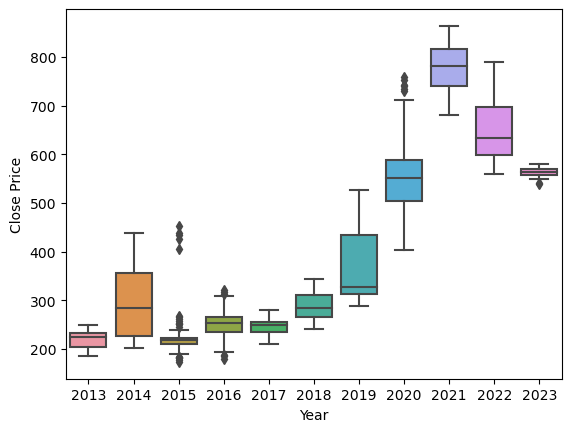

In [18]:
import seaborn as sns

# Load stock market data
br1 = pd.read_csv(r'C:\Users\Shwetha\Desktop\Project\BERGER PAINTS.csv')

# Convert 'Date' column to datetime and extract year
br1['Date'] = pd.to_datetime(br1['Date'])
br1['Year'] = br1['Date'].dt.year

# Create box plot of 'Close' column by year using seaborn
sns.boxplot(x='Year', y='Close Price', data=br1)

# 2.Line plot

In [19]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Close Price')

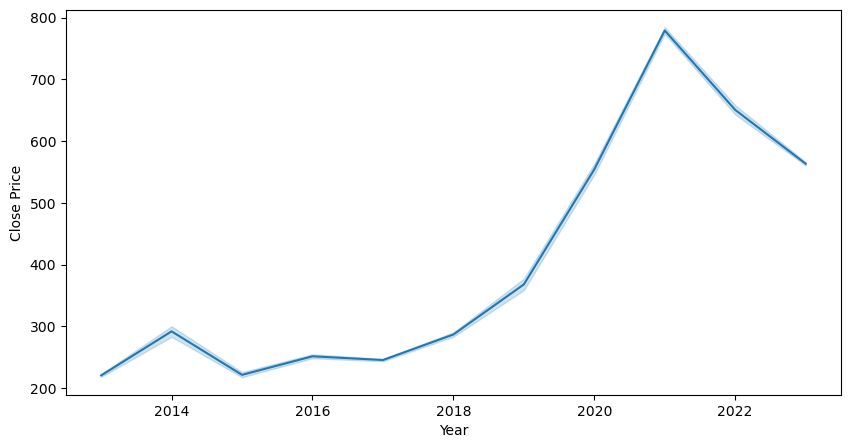

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='Close Price',data=br1)
plt.ylabel('Close Price')

# 3.RSI plot (Relative Strength Index)

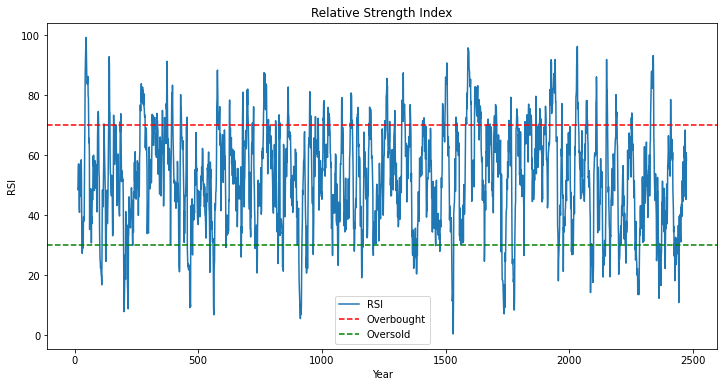

In [23]:
import pandas as pd
import matplotlib.pyplot as plt



# Define the time period for RSI calculation
period = 14

# Calculate the RSI values using the pandas rolling() function
delta = br1['Close Price'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=period).mean()
avg_loss = loss.rolling(window=period).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# Create a new figure and plot the RSI values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(br1.index, rsi, label='RSI')

# Add horizontal lines at the overbought and oversold levels
ax.axhline(y=70, color='r', linestyle='--', label='Overbought')
ax.axhline(y=30, color='g', linestyle='--', label='Oversold')

# Add title, legend, and axis labels
ax.set_title('Relative Strength Index')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('RSI')

# Show the plot
plt.show()

# 4.Candelstick  plot 

In [23]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
import pandas as pd
import numpy as np

C:\Users\Shwetha\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


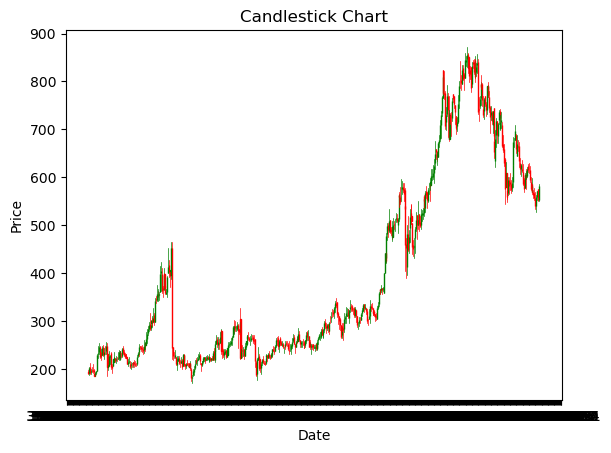

In [5]:
# Load data from a CSV file
br1 = pd.read_csv(r'C:\Users\Shwetha\Desktop\Project\BERGER PAINTS.csv', parse_dates=True, index_col=0)

# Resample the data to weekly intervals
br1 = br1.resample('W').agg({'Open Price': 'first', 'High Price': 'max', 'Low Price': 'min', 'Close Price': 'last'})

# Reset the index to a column
br1 = br1.reset_index()

# Convert the date to the Matplotlib date format
br1['Date'] = br1['Date'].apply(lambda d: d.date())
br1['Date'] = pd.to_datetime(br1['Date'])
br1['Date'] = br1['Date'].apply(lambda d: d.date().toordinal())

# Create a figure and axes instance
fig, ax = plt.subplots()

# Set the x-axis locator to Mondays
mondays = WeekdayLocator(MONDAY)
ax.xaxis.set_major_locator(mondays)

# Format the x-axis dates
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Plot the candlestick chart
candlestick_ohlc(ax, br1.values, width=0.6, colorup='g', colordown='r', alpha=1.0)

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Candlestick Chart')

# Show the plot
plt.show()

# 5.Correlation Heat Map

In [24]:
#Correlation
br1.corr()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.999528,0.999513,0.999163,0.999488,-0.027646,0.237316,0.108793,-0.021521,-0.042656,0.548287,-0.091061
High Price,0.999528,1.000000,0.999403,0.999645,0.999810,-0.026068,0.247842,0.111597,-0.021524,-0.046812,0.562464,-0.067789
Low Price,0.999513,0.999403,1.000000,0.999625,0.999788,-0.028459,0.232723,0.107489,-0.021864,-0.039951,0.533563,-0.067906
Close Price,0.999163,0.999645,0.999625,1.000000,0.999851,-0.027248,0.240999,0.109672,-0.021976,-0.044679,0.548467,-0.050240
WAP,0.999488,0.999810,0.999788,0.999851,1.000000,-0.027228,0.241376,0.109647,-0.021832,-0.044165,0.548577,-0.061812
No.of Shares,-0.027646,-0.026068,-0.028459,-0.027248,-0.027228,1.000000,0.158344,0.965571,0.982939,0.147860,0.042923,0.011653
No. of Trades,0.237316,0.247842,0.232723,0.240999,0.241376,0.158344,1.000000,0.265079,0.060862,-0.023801,0.497707,0.072870
Total Turnover (Rs.),0.108793,0.111597,0.107489,0.109672,0.109647,0.965571,0.265079,1.000000,0.926250,0.168208,0.159499,0.013697
Deliverable Quantity,-0.021521,-0.021524,-0.021864,-0.021976,-0.021832,0.982939,0.060862,0.926250,1.000000,0.192661,-0.003608,-0.009557
% Deli. Qty to Traded Qty,-0.042656,-0.046812,-0.039951,-0.044679,-0.044165,0.147860,-0.023801,0.168208,0.192661,1.000000,-0.190636,-0.046184


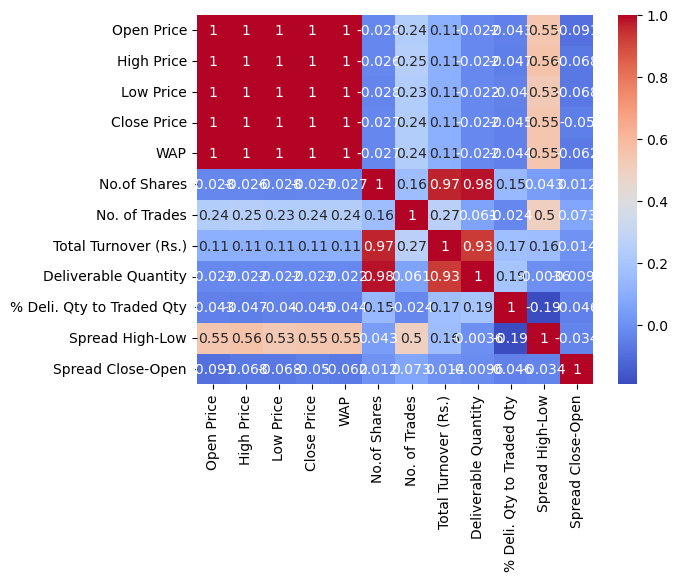

In [25]:
# calculate correlation matrix
corr_matrix = br1.corr()

# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
import seaborn as sns

# 6.Decompostion plot 

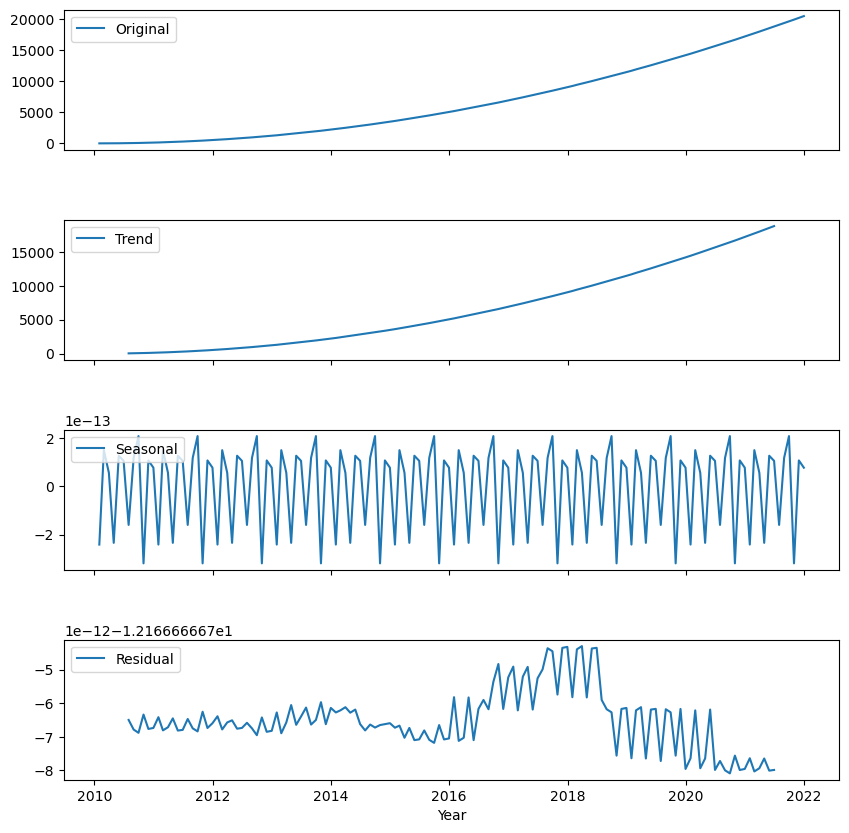

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate some sample data
br1 = pd.DataFrame({
    'Date': pd.date_range(start='2010-01-01', end='2021-12-31', freq='M'),
    'value': [i**2 for i in range(144)]
})
br1.set_index('Date', inplace=True)

# Decompose the time series
decomp = seasonal_decompose(br1, model='additive')

# Plot the results
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

# Original time series
axes[0].plot(br1.index, br1['value'], label='Original')
axes[0].legend(loc='upper left')

# Trend component
axes[1].plot(br1.index, decomp.trend, label='Trend')
axes[1].legend(loc='upper left')

# Seasonal component
axes[2].plot(br1.index, decomp.seasonal, label='Seasonal')
axes[2].legend(loc='upper left')
# Residual component
axes[3].plot(br1.index, decomp.resid, label='Residual')
axes[3].legend(loc='upper left')

# Set x-axis label
axes[-1].set_xlabel('Year')

plt.show()

# Stationarity data

# Kwiatkowski-Phillips-Schmidt-Shin 

In [60]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

# Load the time series data
br1 = pd.read_csv(r'C:\Users\Shwetha\Desktop\Project\BERGER PAINTS.csv', index_col='Date', parse_dates=True)

# Perform the KPSS test
kpss_stat, p_value, lags, critical_values = kpss(br1['Close Price'])

# Print the results
print('KPSS Statistic:', kpss_stat)
print('p-value:', p_value)
print('Lags Used:', lags)
print('Critical Values:', critical_values)

KPSS Statistic: 6.180432970254543
p-value: 0.01
Lags Used: 30
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\Shwetha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


If the p-value is greater than 0.05 or the absolute value of the test statistics is less than the critical value, 
we fail to reject H0 and conclude that the time series is stationary.

By KPSS test p-value is less than 0.05 hence the data is still non-stationary.

# ADF test

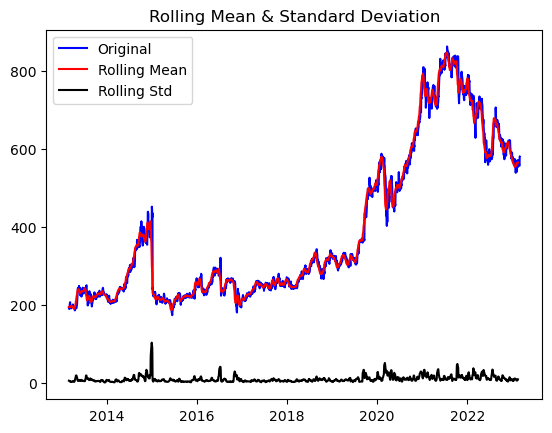

ADF Test Results:
Test Statistic: -1.057
p-value: 0.732
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
p-value > 0.05: The data is non-stationary.


In [61]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load time series data into a pandas dataframe
br1 = pd.read_csv(r'C:\Users\Shwetha\Desktop\Project\BERGER PAINTS.csv', index_col='Date', parse_dates=True)

# Define a function to test stationarity of the data
def test_stationarity(timeseries):
    
    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Perform the ADF test
    adf_result = adfuller(timeseries, autolag='AIC')

    # Extract and print test results
    print('ADF Test Results:')
    print('Test Statistic: {:.3f}'.format(adf_result[0]))
    print('p-value: {:.3f}'.format(adf_result[1]))
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t{}: {:.3f}'.format(key, value))

    # Interpret test results
    if adf_result[1] <= 0.05:
        print('p-value <= 0.05: The data is stationary.')
    else:
        print('p-value > 0.05: The data is non-stationary.')
        
# Call the function on your time series data
test_stationarity(br1['Close Price'])

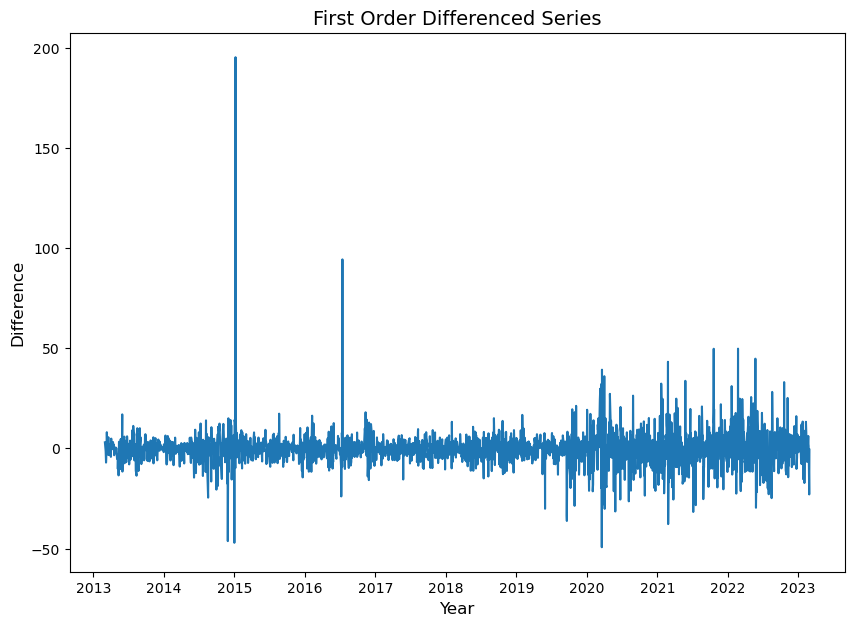

In [42]:
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
br1['Difference'] = br1['Close Price'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(br1['Difference'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [44]:
result = adfuller(br1.Difference.dropna())
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

(-25.42936584327061, 0.0, 3, 2470, {'1%': -3.4330002465470844, '5%': -2.862710858596359, '10%': -2.567393294431969}, 17591.399165992116)
ADF Test Statistic: -25.43
5% Critical Value: -2.86
p-value: 0.00


The p-value is less than 0.05. You reject the null hypothesis and conclude that the time series is stationary.

Thus, the Berger price series was a difference-stationary series. The first-order difference of the Berger price series resulted in a stationary series.

In [26]:
br = br1.drop(['WAP','No. of Trades','Total Turnover (Rs.)','Deliverable Quantity','% Deli. Qty to Traded Qty','Spread High-Low','Spread Close-Open'],axis =1)

In [27]:
br

,Date,Open Price,High Price,Low Price,Close Price,No.of Shares,day,month,year
0,2013-03-01,194.00,197.00,190.00,192.40,51814,01,Mar,13
1,2013-03-04,193.30,193.30,186.55,189.40,34471,04,Mar,13
2,2013-03-05,191.20,194.00,189.10,189.70,28661,05,Mar,13
3,2013-03-06,191.00,196.70,188.40,191.05,89943,06,Mar,13
4,2013-03-07,195.00,196.00,190.70,194.40,40254,07,Mar,13
...,...,...,...,...,...,...,...,...,...
2470,2023-02-23,567.25,567.25,552.60,560.50,33700,23,Feb,23
2471,2023-02-24,556.15,569.85,552.30,558.40,29975,24,Feb,23
2472,2023-02-27,553.05,559.10,550.00,557.20,33372,27,Feb,23
2473,2023-02-28,550.05,582.60,550.05,580.20,81860,28,Feb,23


In [28]:
br.shape

(2475, 9)

In [29]:
# Spilting Data into Training and Testing 

data_training = pd.DataFrame(br['Close Price'][0:int(len(br)*0.70)])
data_testing = pd.DataFrame(br['Close Price'][int(len(br)*0.70): int(len(br))])

print(data_training.shape)
print(data_testing.shape)

(1732, 1)
(743, 1)


In [30]:
data_training.head()

,Close Price
0,192.40
1,189.40
2,189.70
3,191.05
4,194.40


In [31]:
data_testing.head()

,Close Price
1732,534.8
1733,526.9
1734,502.4
1735,472.7
1736,458.4


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04533944],
       [0.03810443],
       [0.03882793],
       ...,
       [0.88689256],
       [0.88423972],
       [0.88303388]])

In [34]:
data_training_array.shape

(1732, 1)

In [36]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
# Modelling

In [38]:
from keras.layers import Dense, Dropout, LSTM
from keras.models  import Sequential

In [39]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [41]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
51/51 [==============================] - 9s 120ms/step - loss: 0.0254
Epoch 2/50
51/51 [==============================] - 7s 143ms/step - loss: 0.0071
Epoch 3/50
51/51 [==============================] - 7s 140ms/step - loss: 0.0062
Epoch 4/50
51/51 [==============================] - 7s 136ms/step - loss: 0.0056
Epoch 5/50
51/51 [==============================] - 6s 123ms/step - loss: 0.0048
Epoch 6/50
51/51 [==============================] - 6s 125ms/step - loss: 0.0053
Epoch 7/50
51/51 [==============================] - 6s 125ms/step - loss: 0.0057
Epoch 8/50
51/51 [==============================] - 6s 125ms/step - loss: 0.0056
Epoch 9/50
51/51 [==============================] - 6s 126ms/step - loss: 0.0044
Epoch 10/50
51/51 [==============================] - 6s 127ms/step - loss: 0.0041
Epoch 11/50
51/51 [==============================] - 6s 126ms/step - loss: 0.0037
Epoch 12/50
51/51 [==============================] - 6s 125ms/step - loss: 0.0036
Epoch 13/50
51/51 [======

In [42]:
model.save('keras_model.h5')

In [43]:
data_testing.head()

,Close Price
1732,534.8
1733,526.9
1734,502.4
1735,472.7
1736,458.4


In [44]:
past_100 = data_training.tail(100)

In [45]:
final_br = past_100.append(data_testing, ignore_index = True)

C:\Users\Asad\AppData\Local\Temp\ipykernel_20140\853381817.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_br = past_100.append(data_testing, ignore_index = True)


In [47]:
final_br.head()

,Close Price
0,478.30
1,471.10
2,486.40
3,499.05
4,479.55


In [48]:
input_data = scaler.fit_transform(final_br)
input_data

array([[0.16382771],
       [0.1482044 ],
       [0.18140393],
       [0.20885321],
       [0.16654009],
       [0.18411631],
       [0.18726267],
       [0.19355539],
       [0.19019204],
       [0.20809374],
       [0.20646631],
       [0.26874254],
       [0.22957578],
       [0.21872627],
       [0.20917869],
       [0.20093306],
       [0.22512748],
       [0.17912553],
       [0.17554519],
       [0.16729956],
       [0.17239883],
       [0.18303136],
       [0.19084301],
       [0.17912553],
       [0.17880004],
       [0.17012043],
       [0.16078984],
       [0.18932408],
       [0.19225344],
       [0.19409786],
       [0.20017359],
       [0.20299447],
       [0.19908864],
       [0.21254204],
       [0.20516437],
       [0.19724422],
       [0.21178258],
       [0.20494738],
       [0.20331995],
       [0.20950418],
       [0.20744277],
       [0.21221656],
       [0.19485733],
       [0.1956168 ],
       [0.21102311],
       [0.22274059],
       [0.22556146],
       [0.254

In [49]:
input_data.shape

(843, 1)

In [50]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(743, 100, 1)
(743,)


In [52]:
# Making Predictions 
y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 30ms/step


In [53]:
y_predicted.shape

(743, 1)

In [54]:
y_test

array([0.28642725, 0.26928502, 0.21612238, 0.15167625, 0.12064663,
       0.05576652, 0.09873061, 0.06997939, 0.        , 0.10708473,
       0.02191602, 0.04524249, 0.10296192, 0.16361072, 0.16990344,
       0.16274276, 0.20527287, 0.17793208, 0.09981556, 0.16534664,
       0.1326896 , 0.15590756, 0.19529131, 0.23727894, 0.24205273,
       0.24595855, 0.24205273, 0.26353477, 0.27666269, 0.26125637,
       0.25366171, 0.27807313, 0.27536075, 0.24671802, 0.22957578,
       0.17055441, 0.14343062, 0.13355756, 0.10361289, 0.11326896,
       0.10827818, 0.11836823, 0.11543886, 0.11370294, 0.10350439,
       0.0808289 , 0.08017793, 0.08940002, 0.13583596, 0.11891071,
       0.11923619, 0.11326896, 0.12520343, 0.19355539, 0.18921558,
       0.21677335, 0.24422263, 0.21861777, 0.23413258, 0.21015515,
       0.19051752, 0.19984811, 0.18758815, 0.21362699, 0.20939568,
       0.2224151 , 0.21395248, 0.20841923, 0.21254204, 0.2224151 ,
       0.24454812, 0.29998915, 0.25518064, 0.23424108, 0.21579

In [55]:
y_predicted

array([[0.34867227],
       [0.33316123],
       [0.3186339 ],
       [0.2989757 ],
       [0.26693964],
       [0.23081173],
       [0.19824062],
       [0.17156309],
       [0.15088199],
       [0.13414563],
       [0.12224167],
       [0.1139026 ],
       [0.1082717 ],
       [0.10584121],
       [0.10710432],
       [0.11073358],
       [0.11483423],
       [0.11892313],
       [0.12265372],
       [0.1260094 ],
       [0.12912203],
       [0.13205947],
       [0.13493168],
       [0.13823923],
       [0.14307353],
       [0.15136485],
       [0.16351984],
       [0.17821527],
       [0.19372997],
       [0.20935526],
       [0.22451887],
       [0.23830953],
       [0.25067878],
       [0.2613619 ],
       [0.26799217],
       [0.26831985],
       [0.2547767 ],
       [0.22977397],
       [0.20355415],
       [0.18061386],
       [0.16207305],
       [0.1481462 ],
       [0.13832143],
       [0.13198873],
       [0.12835914],
       [0.12639844],
       [0.1249382 ],
       [0.123

In [56]:
scaler.scale_

array([0.0021699])

In [57]:
scale_factor = 1/0.0021699
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

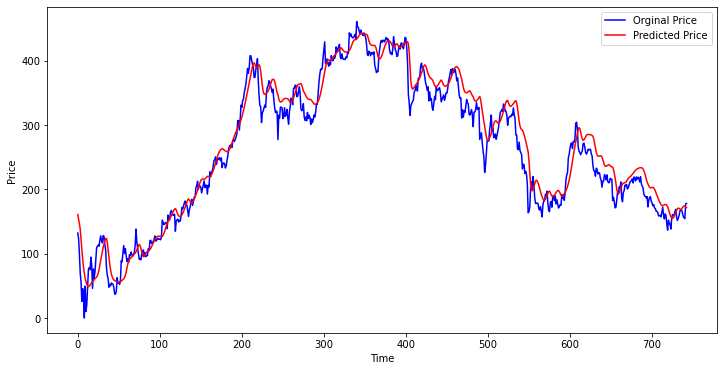

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orginal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()